In [1]:
import pandas as pd
import pickle

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score # Accuracy metrics 


In [2]:
df = pd.read_csv('Dataset/csv/v4_coords.csv')

In [3]:
X = df.drop('class', axis=1) # features
y = df['class'] # target value

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1234)

In [4]:
y_test

367    Right_Uppercut
69                Jab
539              Idle
248        Right_Hook
415             Guard
            ...      
171         Left_Hook
221         Left_Hook
121          Straight
464             Guard
466             Guard
Name: class, Length: 91, dtype: object

In [5]:
nan_values = df.isna().sum()
print(nan_values)

class    0
x1       0
y1       0
z1       0
v1       0
x2       0
y2       0
z2       0
v2       0
x3       0
y3       0
z3       0
v3       0
x4       0
y4       0
z4       0
v4       0
x5       0
y5       0
z5       0
v5       0
x6       0
y6       0
z6       0
v6       0
x7       0
y7       0
z7       0
v7       0
x8       0
y8       0
z8       0
v8       0
x9       0
y9       0
z9       0
v9       0
x10      0
y10      0
z10      0
v10      0
dtype: int64


# Pipeline of the classfication

In [20]:
import matplotlib
import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.svm import *

In [23]:
model = make_pipeline(StandardScaler(), SVC(probability=True)).fit(X_train, y_train)
y_pred = model.predict(X_train)

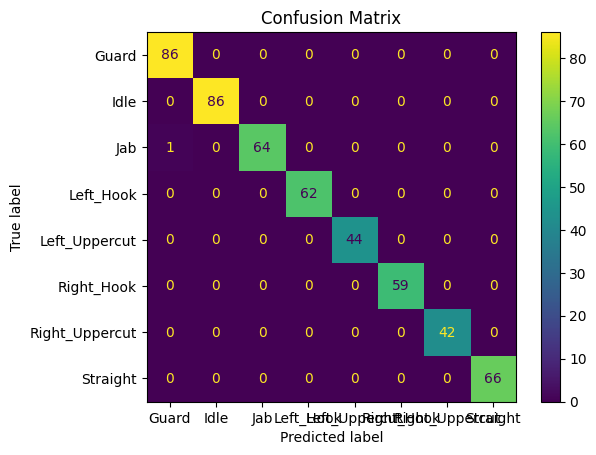

In [25]:
conf_matrix = confusion_matrix(y_train, y_pred)

# Display the confusion matrix using sklearn's visualization tools
cm_display = ConfusionMatrixDisplay(conf_matrix, display_labels=model.classes_)
cm_display.plot(cmap='viridis')
plt.title('Confusion Matrix')
plt.show()

In [26]:
version = 4_2
with open(f'../Model/v{version}_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [ ]:
print(accuracy_score(y_train, y_pred))

ValueError: Found input variables with inconsistent numbers of samples: [91, 510]